# Shooting Guards NBA Clustering with KMeans

Through this notebook I will perform clustering over NBA Shooting Guards data to try to identifies the different play
style.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
players_data = pd.read_csv('PlayersAdvStats.csv')
shooting_guards_data = players_data[players_data['position'] == 'SG']
del shooting_guards_data['position']
del shooting_guards_data['team_id']
shooting_guards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,Kyle,Korver,1838.732,9.537,3.463,4.537,8.000,1.878,5.000,...,0.550305,0.106707,0.234756,0.648923,12.815404,1.236092,14.662028,10.312763,1.251121,14.556519
12,202323,Evan,Turner,1600.167,9.190,3.738,5.024,8.762,0.214,1.452,...,0.438859,0.203804,0.024457,2.468097,16.523842,0.925171,17.995910,22.989286,1.738354,18.961477
13,202340,Avery,Bradley,1963.405,14.757,5.784,7.432,13.216,1.946,5.432,...,0.511247,0.124744,0.147239,2.107672,6.682212,0.658387,9.476344,10.122548,2.412305,20.441795
18,203935,Marcus,Smart,1634.773,8.500,2.955,6.045,9.000,0.773,3.818,...,0.371212,0.292929,0.085859,5.853792,12.203178,1.063905,10.777583,16.921959,2.991969,18.152655
22,2747,J.R.,Smith,1758.543,12.114,4.514,6.514,11.029,2.343,6.200,...,0.515544,0.108808,0.212435,2.615104,8.813698,0.748586,6.257532,8.972173,1.899008,19.750435
27,201569,Eric,Gordon,2013.850,14.875,5.000,7.225,12.225,2.500,6.600,...,0.511247,0.218814,0.204499,0.860024,7.051979,0.748928,10.516125,15.780496,1.538781,24.438451
43,202710,Jimmy,Butler,2249.600,22.075,7.275,9.050,16.325,1.025,3.450,...,0.477029,0.479326,0.062787,3.182487,10.663145,1.527013,9.291974,18.249719,2.371894,25.009412
44,202734,E'Twaun,Moore,867.172,4.207,1.759,2.103,3.862,0.310,0.931,...,0.495536,0.169643,0.080357,1.294034,9.538656,0.705022,11.733646,8.216026,1.747336,13.998300
57,200751,Randy,Foye,1195.744,6.023,2.163,4.233,6.395,0.884,3.209,...,0.407273,0.149091,0.138182,1.838582,8.848834,1.109462,14.074595,16.303906,1.321631,18.207411
61,203115,Will,Barton,1725.605,15.279,5.558,7.047,12.605,1.605,4.256,...,0.504613,0.238007,0.127306,3.549085,21.269438,1.188135,10.333054,15.427235,1.700797,24.703600


In [3]:
X_sg_unscaled = shooting_guards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler_sg = StandardScaler()
scaler_sg.fit(X_sg_unscaled)
X_sg = scaler_sg.transform(X_sg_unscaled)

When we have the input data scaled we need to run K-Means with different clusters numbers and print the elbow curve to
identify the optimal value of clusters' numbers.

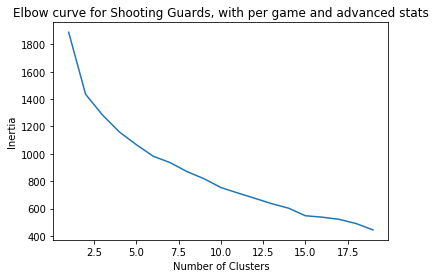

In [4]:
cluster_number = range(1, 20)
sg_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia = [sg_kmeans_models[i].fit(X_sg).inertia_ for i in range(len(sg_kmeans_models))]
plt.plot(cluster_number, sg_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Shooting Guards, with per game and advanced stats')
plt.savefig('Figures/SG/sg-kmeans-full.png')
plt.show()

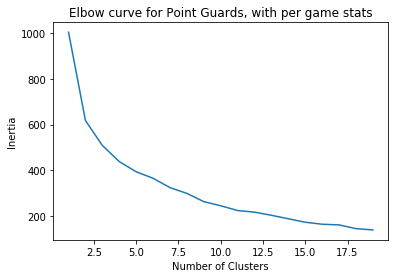

In [5]:
X_sg_per_game_unscaled = shooting_guards_data.copy()
X_sg_per_game_unscaled = X_sg_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%',
                                                      'DefRtg', 'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate',
                                                      'OR%', 'DR%', 'BLK%', 'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_sg_per_game = StandardScaler()
scaler_sg_per_game.fit(X_sg_per_game_unscaled)
X_sg_per_game = scaler_sg_per_game.transform(X_sg_per_game_unscaled)

sg_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia_per_game = [sg_kmeans_models_per_game[i].fit(X_sg_per_game).inertia_
                       for i in range(len(sg_kmeans_models_per_game))]
plt.plot(cluster_number, sg_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game stats')
plt.savefig('Figures/SG/sg-kmeans-per-game.png')
plt.show()

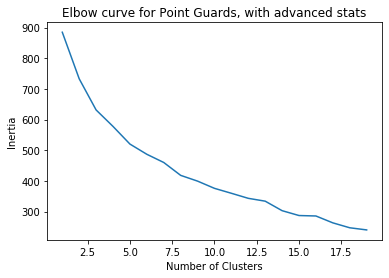

In [6]:
X_sg_advanced_unscaled = shooting_guards_data.copy()
X_sg_advanced_unscaled = X_sg_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                      'scored_points_per_game', 'field_goals_made_per_game',
                                                      'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                      'three_points_field_goals_made_per_game',
                                                      'three_points_field_goals_attempts_per_game',
                                                      'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                      'free_throws_attempts_per_game', 'assists_per_game',
                                                      'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                      'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                      'personal_fouls_per_game'], 1)
scaler_sg_advanced = StandardScaler()
scaler_sg_advanced.fit(X_sg_advanced_unscaled)
X_sg_advanced = scaler_sg_advanced.transform(X_sg_advanced_unscaled)

sg_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia_advanced = [sg_kmeans_models_advanced[i].fit(X_sg_advanced).inertia_ for i in range(len(sg_kmeans_models_advanced))]
plt.plot(cluster_number, sg_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with advanced stats')
plt.savefig('Figures/SG/sg-kmeans-advanced.png')
plt.show()

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 5.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [7]:
# KMeans_sg_full = KMeans(n_clusters=6, n_init=20).fit(X_sg)
# joblib.dump(KMeans_pg_full, 'Models/kmeans_sg_full.sav')

KMeans_sg_full = joblib.load('Models/kmeans_sg_full.sav')

sg_full_predicted_classes = KMeans_sg_full.predict(X_sg)
sg_full = shooting_guards_data.copy()
sg_full.insert(1, 'Cluster', sg_full_predicted_classes)
sg_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,2,Kyle,Korver,1838.732,9.537,3.463,4.537,8.000,1.878,...,0.550305,0.106707,0.234756,0.648923,12.815404,1.236092,14.662028,10.312763,1.251121,14.556519
12,202323,3,Evan,Turner,1600.167,9.190,3.738,5.024,8.762,0.214,...,0.438859,0.203804,0.024457,2.468097,16.523842,0.925171,17.995910,22.989286,1.738354,18.961477
13,202340,2,Avery,Bradley,1963.405,14.757,5.784,7.432,13.216,1.946,...,0.511247,0.124744,0.147239,2.107672,6.682212,0.658387,9.476344,10.122548,2.412305,20.441795
18,203935,3,Marcus,Smart,1634.773,8.500,2.955,6.045,9.000,0.773,...,0.371212,0.292929,0.085859,5.853792,12.203178,1.063905,10.777583,16.921959,2.991969,18.152655
22,2747,0,J.R.,Smith,1758.543,12.114,4.514,6.514,11.029,2.343,...,0.515544,0.108808,0.212435,2.615104,8.813698,0.748586,6.257532,8.972173,1.899008,19.750435
27,201569,2,Eric,Gordon,2013.850,14.875,5.000,7.225,12.225,2.500,...,0.511247,0.218814,0.204499,0.860024,7.051979,0.748928,10.516125,15.780496,1.538781,24.438451
43,202710,1,Jimmy,Butler,2249.600,22.075,7.275,9.050,16.325,1.025,...,0.477029,0.479326,0.062787,3.182487,10.663145,1.527013,9.291974,18.249719,2.371894,25.009412
44,202734,4,E'Twaun,Moore,867.172,4.207,1.759,2.103,3.862,0.310,...,0.495536,0.169643,0.080357,1.294034,9.538656,0.705022,11.733646,8.216026,1.747336,13.998300
57,200751,4,Randy,Foye,1195.744,6.023,2.163,4.233,6.395,0.884,...,0.407273,0.149091,0.138182,1.838582,8.848834,1.109462,14.074595,16.303906,1.321631,18.207411
61,203115,2,Will,Barton,1725.605,15.279,5.558,7.047,12.605,1.605,...,0.504613,0.238007,0.127306,3.549085,21.269438,1.188135,10.333054,15.427235,1.700797,24.703600


In [8]:
sg_full_cluster_size = pd.DataFrame()
sg_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
sg_full_cluster_size['Players'] = sg_full.groupby('Cluster').size()
sg_full_cluster_size

,Cluster,Players
0,0,17.0
1,1,8.0
2,2,21.0
3,3,6.0
4,4,7.0
5,5,NaN


In [9]:
# KMeans_sg_per_game = KMeans(n_clusters=6, n_init=20).fit(X_sg_per_game)
# joblib.dump(KMeans_sg_per_game, 'Models/kmeans_sg_per_game.sav')

KMeans_sg_per_game = joblib.load('Models/kmeans_sg_per_game.sav')

sg_per_game_predicted_classes = KMeans_sg_per_game.predict(X_sg_per_game)
sg_per_game = shooting_guards_data.copy()
sg_per_game.insert(1, 'Cluster', sg_per_game_predicted_classes)
sg_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,3,Kyle,Korver,1838.732,9.537,3.463,4.537,8.000,1.878,...,0.550305,0.106707,0.234756,0.648923,12.815404,1.236092,14.662028,10.312763,1.251121,14.556519
12,202323,0,Evan,Turner,1600.167,9.190,3.738,5.024,8.762,0.214,...,0.438859,0.203804,0.024457,2.468097,16.523842,0.925171,17.995910,22.989286,1.738354,18.961477
13,202340,3,Avery,Bradley,1963.405,14.757,5.784,7.432,13.216,1.946,...,0.511247,0.124744,0.147239,2.107672,6.682212,0.658387,9.476344,10.122548,2.412305,20.441795
18,203935,0,Marcus,Smart,1634.773,8.500,2.955,6.045,9.000,0.773,...,0.371212,0.292929,0.085859,5.853792,12.203178,1.063905,10.777583,16.921959,2.991969,18.152655
22,2747,3,J.R.,Smith,1758.543,12.114,4.514,6.514,11.029,2.343,...,0.515544,0.108808,0.212435,2.615104,8.813698,0.748586,6.257532,8.972173,1.899008,19.750435
27,201569,3,Eric,Gordon,2013.850,14.875,5.000,7.225,12.225,2.500,...,0.511247,0.218814,0.204499,0.860024,7.051979,0.748928,10.516125,15.780496,1.538781,24.438451
43,202710,5,Jimmy,Butler,2249.600,22.075,7.275,9.050,16.325,1.025,...,0.477029,0.479326,0.062787,3.182487,10.663145,1.527013,9.291974,18.249719,2.371894,25.009412
44,202734,1,E'Twaun,Moore,867.172,4.207,1.759,2.103,3.862,0.310,...,0.495536,0.169643,0.080357,1.294034,9.538656,0.705022,11.733646,8.216026,1.747336,13.998300
57,200751,1,Randy,Foye,1195.744,6.023,2.163,4.233,6.395,0.884,...,0.407273,0.149091,0.138182,1.838582,8.848834,1.109462,14.074595,16.303906,1.321631,18.207411
61,203115,2,Will,Barton,1725.605,15.279,5.558,7.047,12.605,1.605,...,0.504613,0.238007,0.127306,3.549085,21.269438,1.188135,10.333054,15.427235,1.700797,24.703600


In [10]:
sg_per_game_cluster_size = pd.DataFrame()
sg_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sg_per_game_cluster_size['Players'] = sg_per_game.groupby('Cluster').size()
sg_per_game_cluster_size

,Cluster,Players
0,0,10
1,1,18
2,2,9
3,3,18
4,4,1


In [11]:
# KMeans_sg_advanced = KMeans(n_clusters=6, n_init=20).fit(X_sg_advanced)
# joblib.dump(KMeans_sg_advanced, 'Models/kmeans_sg_advanced.sav')

KMeans_sg_advanced = joblib.load('Models/kmeans_sg_advanced.sav')

sg_advanced_predicted_classes = KMeans_sg_advanced.predict(X_sg_advanced)
sg_advanced = shooting_guards_data.copy()
sg_advanced.insert(1, 'Cluster', sg_advanced_predicted_classes)
sg_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,4,Kyle,Korver,1838.732,9.537,3.463,4.537,8.000,1.878,...,0.550305,0.106707,0.234756,0.648923,12.815404,1.236092,14.662028,10.312763,1.251121,14.556519
12,202323,5,Evan,Turner,1600.167,9.190,3.738,5.024,8.762,0.214,...,0.438859,0.203804,0.024457,2.468097,16.523842,0.925171,17.995910,22.989286,1.738354,18.961477
13,202340,1,Avery,Bradley,1963.405,14.757,5.784,7.432,13.216,1.946,...,0.511247,0.124744,0.147239,2.107672,6.682212,0.658387,9.476344,10.122548,2.412305,20.441795
18,203935,3,Marcus,Smart,1634.773,8.500,2.955,6.045,9.000,0.773,...,0.371212,0.292929,0.085859,5.853792,12.203178,1.063905,10.777583,16.921959,2.991969,18.152655
22,2747,4,J.R.,Smith,1758.543,12.114,4.514,6.514,11.029,2.343,...,0.515544,0.108808,0.212435,2.615104,8.813698,0.748586,6.257532,8.972173,1.899008,19.750435
27,201569,2,Eric,Gordon,2013.850,14.875,5.000,7.225,12.225,2.500,...,0.511247,0.218814,0.204499,0.860024,7.051979,0.748928,10.516125,15.780496,1.538781,24.438451
43,202710,0,Jimmy,Butler,2249.600,22.075,7.275,9.050,16.325,1.025,...,0.477029,0.479326,0.062787,3.182487,10.663145,1.527013,9.291974,18.249719,2.371894,25.009412
44,202734,1,E'Twaun,Moore,867.172,4.207,1.759,2.103,3.862,0.310,...,0.495536,0.169643,0.080357,1.294034,9.538656,0.705022,11.733646,8.216026,1.747336,13.998300
57,200751,2,Randy,Foye,1195.744,6.023,2.163,4.233,6.395,0.884,...,0.407273,0.149091,0.138182,1.838582,8.848834,1.109462,14.074595,16.303906,1.321631,18.207411
61,203115,5,Will,Barton,1725.605,15.279,5.558,7.047,12.605,1.605,...,0.504613,0.238007,0.127306,3.549085,21.269438,1.188135,10.333054,15.427235,1.700797,24.703600


In [12]:
sg_advanced_cluster_size = pd.DataFrame()
sg_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sg_advanced_cluster_size['Players'] = sg_advanced.groupby('Cluster').size()
sg_advanced_cluster_size

,Cluster,Players
0,0,7
1,1,25
2,2,8
3,3,2
4,4,10


Now we are going to group the players and see the players grouped by each cluster.

#### Model fitted with all the stats.

In [13]:
sg_full['played_minutes_per_game'] = sg_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster0 = sg_full[sg_full['Cluster'] == 0]
sg_full_cluster0 = sg_full_cluster0.drop(['player_id'], 1)
sg_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
22,0,J.R.,Smith,29.31,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
63,0,Gary,Harris,29.89,10.81,4.16,5.16,9.32,1.32,3.60,...,0.52,0.16,0.14,2.65,8.03,0.70,12.14,10.26,2.00,17.38
70,0,Brandon,Rush,16.65,5.42,2.00,2.36,4.36,1.21,2.61,...,0.60,0.08,0.28,2.83,14.88,1.21,11.29,6.97,1.00,13.64
76,0,Jason,Terry,17.24,6.08,2.13,2.78,4.92,1.30,3.51,...,0.57,0.13,0.26,0.54,6.09,0.81,12.30,12.58,2.38,15.26
83,0,Marcus,Thornton,19.80,10.76,4.00,5.62,9.62,1.68,4.68,...,0.50,0.13,0.17,3.77,10.76,0.12,7.61,12.52,2.14,24.64
90,0,JJ,Redick,27.98,16.51,5.54,5.83,11.37,2.74,5.60,...,0.61,0.26,0.24,0.47,6.11,0.17,8.45,9.42,0.91,22.22
96,0,Austin,Rivers,21.63,7.81,3.03,4.08,7.11,0.69,2.39,...,0.47,0.21,0.10,2.05,7.40,0.53,9.38,9.08,1.55,17.81
111,0,Tyler,Johnson,23.22,8.59,3.19,3.53,6.72,0.69,1.91,...,0.53,0.29,0.10,4.02,10.67,1.42,14.17,15.24,1.73,18.57
142,0,Arron,Afflalo,32.50,13.95,5.57,6.35,11.92,1.30,3.46,...,0.52,0.15,0.11,1.27,11.23,0.40,6.94,9.27,0.54,19.03
155,0,Evan,Fournier,31.54,13.49,4.80,6.54,11.34,1.88,5.05,...,0.51,0.21,0.17,1.48,8.91,0.14,10.73,12.81,2.30,19.71


In [15]:
sg_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       23.70
scored_points_per_game                         9.86
field_goals_made_per_game                      3.66
field_goals_miss_per_game                      4.46
field_goals_attempts_per_game                  8.13
three_points_field_goals_made_per_game         1.33
three_points_field_goals_attempts_per_game     3.41
free_throws_made_per_game                      1.20
free_throws_miss_per_game                      0.28
free_throws_attempts_per_game                  1.48
assists_per_game                               1.54
offensive_rebounds_per_game                    0.46
defensive_rebounds_per_game                    2.00
steals_per_game                                0.77
blocks_per_game                                0.19
turnovers_per_game                             0.97
personal_fouls_per_game                        1.84
OffRtg                                       122.69
Floor%      

In cluster 0 the are shooting guards that are starter stabilised in their team with good shooting percentages.
They are a good scores, with high Offensive rating.

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster1 = sg_full[sg_full['Cluster'] == 1]
sg_full_cluster1 = sg_full_cluster1.drop(['player_id'], 1)
sg_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
43,1,Jimmy,Butler,37.49,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
72,1,Klay,Thompson,33.03,20.70,7.47,8.72,16.20,3.27,7.58,...,0.56,0.19,0.20,1.63,10.52,1.79,9.55,12.12,0.72,26.14
80,1,James,Harden,37.10,27.84,8.16,11.12,19.28,2.72,7.95,...,0.49,0.53,0.14,2.46,16.25,1.46,16.44,35.68,2.20,33.97
117,1,Khris,Middleton,35.64,17.60,6.11,7.84,13.96,2.07,4.84,...,0.51,0.27,0.15,1.28,10.88,0.49,10.79,21.62,1.71,24.85
183,1,Brandon,Knight,36.12,19.80,7.35,10.03,17.38,2.10,6.30,...,0.48,0.20,0.12,2.04,9.81,0.72,14.94,24.99,1.92,26.83
196,1,CJ,McCollum,35.23,21.02,8.16,10.26,18.42,2.56,6.39,...,0.51,0.14,0.14,1.86,9.94,0.50,10.43,23.87,1.75,28.94
230,1,DeMar,DeRozan,36.44,23.55,8.00,9.74,17.74,0.57,1.83,...,0.47,0.47,0.03,2.48,11.32,0.74,9.66,21.76,1.51,29.85
263,1,Bradley,Beal,34.04,19.19,7.09,8.71,15.81,2.19,5.33,...,0.52,0.23,0.14,3.39,11.92,0.71,12.86,15.80,1.59,26.40


In [17]:
sg_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       35.64
scored_points_per_game                        21.47
field_goals_made_per_game                      7.45
field_goals_miss_per_game                      9.43
field_goals_attempts_per_game                 16.89
three_points_field_goals_made_per_game         2.06
three_points_field_goals_attempts_per_game     5.46
free_throws_made_per_game                      4.50
free_throws_miss_per_game                      0.86
free_throws_attempts_per_game                  5.36
assists_per_game                               4.32
offensive_rebounds_per_game                    0.71
defensive_rebounds_per_game                    3.64
steals_per_game                                1.18
blocks_per_game                                0.44
turnovers_per_game                             2.61
personal_fouls_per_game                        2.35
OffRtg                                       116.15
Floor%      

In the cluster 2 the are starters with much minutes per game and good shooting percentages, bu they didn't score a lot
of points per game. They have high usage so the may be the second o third options in their teams.

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster2 = sg_full[sg_full['Cluster'] == 2]
sg_full_cluster2 = sg_full_cluster2.drop(['player_id'], 1)
sg_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2,Kyle,Korver,30.65,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
13,2,Avery,Bradley,32.72,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
27,2,Eric,Gordon,33.56,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
61,2,Will,Barton,28.76,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70
87,2,Jamal,Crawford,25.20,12.31,4.15,6.44,10.59,1.23,3.74,...,0.45,0.28,0.12,0.81,5.97,0.33,9.90,13.83,1.02,23.50
97,2,Kobe,Bryant,29.67,16.44,5.72,10.75,16.47,1.69,6.78,...,0.40,0.26,0.10,2.49,13.82,0.62,11.17,23.58,1.66,32.81
99,2,Lou,Williams,29.04,15.33,4.33,6.36,10.69,1.57,4.83,...,0.48,0.57,0.15,1.55,9.72,0.74,10.64,18.30,1.85,24.35
102,2,Jordan,Clarkson,32.27,15.17,5.91,7.50,13.40,1.02,3.07,...,0.48,0.22,0.08,3.68,10.17,0.42,11.09,15.05,1.98,24.18
108,2,Gerald,Green,26.51,10.77,4.00,5.94,9.94,1.50,4.56,...,0.48,0.16,0.15,1.99,9.55,1.26,7.41,6.52,1.13,21.21
113,2,O.J.,Mayo,27.11,9.07,3.41,5.72,9.14,1.21,4.10,...,0.44,0.14,0.13,1.54,10.31,0.44,14.04,20.17,2.32,21.09


In [19]:
sg_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       28.09
scored_points_per_game                        12.06
field_goals_made_per_game                      4.25
field_goals_miss_per_game                      6.25
field_goals_attempts_per_game                 10.50
three_points_field_goals_made_per_game         1.44
three_points_field_goals_attempts_per_game     4.25
free_throws_made_per_game                      2.12
free_throws_miss_per_game                      0.47
free_throws_attempts_per_game                  2.59
assists_per_game                               2.34
offensive_rebounds_per_game                    0.47
defensive_rebounds_per_game                    2.54
steals_per_game                                0.86
blocks_per_game                                0.25
turnovers_per_game                             1.52
personal_fouls_per_game                        2.06
OffRtg                                       108.99
Floor%      

For cluster 2 we have stars shooting guards that play much minutes per game with so good shooting percentages.

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster3 = sg_full[sg_full['Cluster'] == 3]
sg_full_cluster3 = sg_full_cluster3.drop(['player_id'], 1)
sg_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
12,3,Evan,Turner,26.67,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
18,3,Marcus,Smart,27.25,8.50,2.96,6.04,9.00,0.77,3.82,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
106,3,Dwyane,Wade,29.69,18.16,7.03,8.51,15.54,0.19,0.81,...,0.46,0.33,0.01,5.00,10.98,1.26,13.08,31.61,1.71,33.69
156,3,Victor,Oladipo,29.39,13.51,5.05,7.32,12.38,1.30,3.78,...,0.46,0.21,0.10,2.07,16.40,1.99,13.94,21.14,2.29,23.96
163,3,Monta,Ellis,33.29,13.76,5.51,7.24,12.76,0.88,3.10,...,0.47,0.19,0.07,1.46,7.72,1.27,16.74,25.39,2.62,22.19
250,3,Tony,Allen,23.46,6.66,2.71,3.69,6.40,0.26,0.69,...,0.44,0.26,0.04,7.41,14.38,1.07,12.28,7.81,3.72,17.33


In [21]:
sg_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       28.29
scored_points_per_game                        11.63
field_goals_made_per_game                      4.50
field_goals_miss_per_game                      6.31
field_goals_attempts_per_game                 10.81
three_points_field_goals_made_per_game         0.60
three_points_field_goals_attempts_per_game     2.27
free_throws_made_per_game                      2.03
free_throws_miss_per_game                      0.68
free_throws_attempts_per_game                  2.71
assists_per_game                               3.63
offensive_rebounds_per_game                    0.98
defensive_rebounds_per_game                    3.18
steals_per_game                                1.34
blocks_per_game                                0.43
turnovers_per_game                             1.99
personal_fouls_per_game                        2.25
OffRtg                                       107.59
Floor%      

For the cluster 3 we have decent scorers and may be the best defender shooting guards.

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster4 = sg_full[sg_full['Cluster'] == 4]
sg_full_cluster4 = sg_full_cluster4.drop(['player_id'], 1)
sg_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
44,4,E'Twaun,Moore,14.45,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,4,Randy,Foye,19.93,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
66,4,Leandro,Barbosa,14.54,6.83,2.72,3.03,5.76,0.66,1.72,...,0.53,0.15,0.11,2.56,7.03,0.88,14.01,15.37,2.83,21.87
100,4,Nick,Young,18.74,7.66,2.66,4.60,7.26,1.60,4.51,...,0.48,0.13,0.22,1.35,8.30,0.63,6.61,4.88,1.48,20.69
121,4,Rashad,Vaughn,11.12,2.19,0.78,1.92,2.70,0.46,1.32,...,0.38,0.07,0.17,2.36,11.05,1.27,12.70,5.85,1.31,14.52
137,4,Wayne,Ellington,18.60,6.53,2.50,3.98,6.47,0.93,2.83,...,0.46,0.12,0.14,1.21,11.37,0.23,8.72,6.60,1.92,18.33
206,4,Ben,McLemore,20.52,7.10,2.65,3.20,5.85,0.82,2.20,...,0.52,0.23,0.14,2.48,7.98,0.53,18.91,7.41,2.09,16.39


In [23]:
sg_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       16.84
scored_points_per_game                         5.79
field_goals_made_per_game                      2.18
field_goals_miss_per_game                      3.29
field_goals_attempts_per_game                  5.47
three_points_field_goals_made_per_game         0.81
three_points_field_goals_attempts_per_game     2.39
free_throws_made_per_game                      0.63
free_throws_miss_per_game                      0.18
free_throws_attempts_per_game                  0.81
assists_per_game                               1.01
offensive_rebounds_per_game                    0.27
defensive_rebounds_per_game                    1.36
steals_per_game                                0.59
blocks_per_game                                0.15
turnovers_per_game                             0.82
personal_fouls_per_game                        1.26
OffRtg                                       102.64
Floor%      

In the cluster 4 we have starters or six men with good ability to score.

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster5 = sg_full[sg_full['Cluster'] == 5]
sg_full_cluster5 = sg_full_cluster5.drop(['player_id'], 1)
sg_full_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%


In [25]:
sg_full_cluster5.mean()

Cluster                                      nan
first_name                                   nan
last_name                                    nan
played_minutes_per_game                      nan
scored_points_per_game                       nan
field_goals_made_per_game                    nan
field_goals_miss_per_game                    nan
field_goals_attempts_per_game                nan
three_points_field_goals_made_per_game       nan
three_points_field_goals_attempts_per_game   nan
free_throws_made_per_game                    nan
free_throws_miss_per_game                    nan
free_throws_attempts_per_game                nan
assists_per_game                             nan
offensive_rebounds_per_game                  nan
defensive_rebounds_per_game                  nan
steals_per_game                              nan
blocks_per_game                              nan
turnovers_per_game                           nan
personal_fouls_per_game                      nan
OffRtg              

In the cluster 5 we have role shooting guards. They can score with decent percentages but they are not the primary option.
